<a href="https://colab.research.google.com/github/fralfaro/MAT281_2023/blob/main/docs/labs/lab_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°05



## Problema 01
<img src="https://drive.google.com/uc?export=view&id=1Ha4ZjgvrlWHQ5vV_VydBkxiFXdgDn8TT" width = "200" align="center"/>


El **Iris dataset** es un conjunto de datos que contine una  muestras de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). Se midió cuatro rasgos de cada muestra: el largo y ancho del sépalo y pétalo, en centímetros.

Lo primero es cargar el conjunto de datos y ver las primeras filas que lo componen:

In [2]:
# librerias

import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 500)  # Ver más columnas de los dataframes


# Ver gráficos de matplotlib en jupyter notebook/lab
%matplotlib inline

In [3]:
# cargar datos
data = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281_2022/main/labs/lab_05/data/iris_contaminados.csv")
data.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

data

,sepal_length,sepal_width,petal_length,petal_width,species
0,4.4,3.2,1.3,3.0,setosa
1,7.2,3.6,6.1,2.5,virginica
2,6.3,3.3,6.0,2.5,VIRGINICA
3,6.7,3.3,5.7,2.5,virginica
4,6.3,3.4,5.6,2.4,virginica
...,...,...,...,...,...
145,5.3,3.0,1.1,0.1,Setosa
146,4.8,3.0,1.4,0.1,Setosa
147,4.9,3.1,1.5,0.1,Setosa
148,4.9,3.6,1.4,0.1,setosa


### Bases del experimento

Lo primero es identificar las variables que influyen en el estudio y la naturaleza de esta.

* **species**:
    * Descripción: Nombre de la especie de Iris.
    * Tipo de dato: *string*
    * Limitantes: solo existen tres tipos (setosa, virginia y versicolor).
* **sepalLength**:
    * Descripción: largo del sépalo.
    * Tipo de dato: *float*.
    * Limitantes: los valores se encuentran entre 4.0 y 7.0 cm.
* **sepalWidth**:
    * Descripción: ancho del sépalo.
    * Tipo de dato: *float*.
    * Limitantes: los valores se encuentran entre 2.0 y 4.5 cm.
* **petalLength**:
    * Descripción: largo del pétalo.
    * Tipo de dato: *float*.
    * Limitantes: los valores se encuentran entre 1.0 y 7.0 cm.
* **petalWidth**:
    * Descripción: ancho del pépalo.
    * Tipo de dato: *float*.
    * Limitantes: los valores se encuentran entre 0.1 y 2.5 cm.

Su objetivo es realizar un correcto **E.D.A.**, para esto debe seguir las siguientes intrucciones:

1. Realizar un conteo de elementos de la columna **species** y corregir según su criterio. Reemplace por "default" los valores `nan`.

In [4]:
data['species'].unique()

array(['setosa', ' virginica', 'VIRGINICA', 'virginica', 'virginica ',
       'versicolor', 'Versicolor', 'VERSICOLOR', nan, 'Setosa', 'SETOSA'],
      dtype=object)

In [5]:
data.loc[data['species']=='VIRGINICA', 'species']='virginica'
data.loc[data['species']==' virginica', 'species']='virginica'
data.loc[data['species']=='virginica ', 'species']='virginica'
data.loc[data['species']=='Setosa', 'species']='setosa'
data.loc[data['species']=='SETOSA', 'species']='setosa'
data.loc[data['species']=='Versicolor', 'species']='versicolor'
data.loc[data['species']=='VERSICOLOR', 'species']='versicolor'
data.loc[data['species'].isnull(), 'species']='default'


In [6]:
data['species'].unique()

array(['setosa', 'virginica', 'versicolor', 'default'], dtype=object)

2. Realizar un gráfico de box-plot sobre el largo y ancho de los petalos y sépalos. Reemplace por **0** los valores nan.

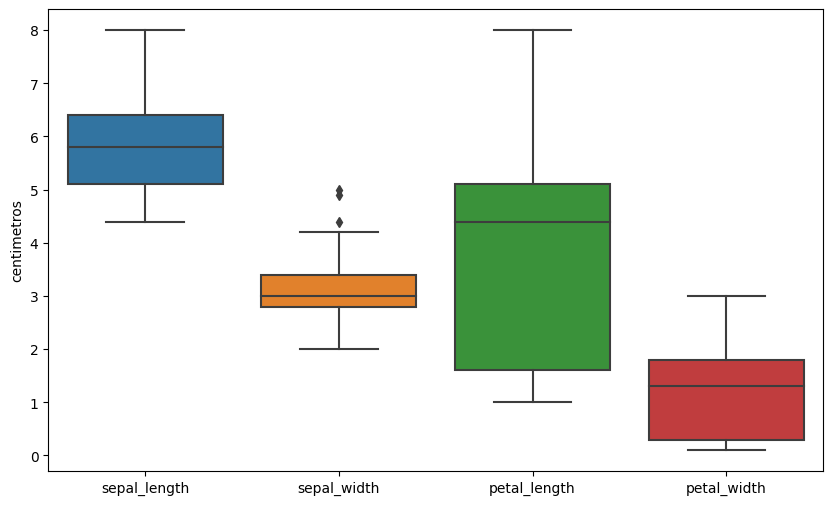

In [7]:
# reemplazamos por 0 los nan.
data.fillna(0)
columnas=data.columns
columnas=columnas.drop('species')
plt.figure(figsize=(10,6))
sns.boxplot(data[columnas]).set(ylabel='centimetros')
plt.show()

3. Anteriormente se define un rango de valores válidos para los valores del largo y ancho de los petalos y sépalos. Agregue una columna denominada **label**  que identifique cuál de estos valores esta fuera del rango de valores válidos.

In [8]:
#   **sepalLength**:
#     * Limitantes: los valores se encuentran entre 4.0 y 7.0 cm.
mask1 = data['sepal_length']<=7.0
mask2 = data['sepal_length']>=4.0
# * **sepalWidth**:
#     * Limitantes: los valores se encuentran entre 2.0 y 4.5 cm.
mask3 = data['sepal_width']<=4.5
mask4 = data['sepal_width']>=2.0
# * **petalLength**:
#     * Limitantes: los valores se encuentran entre 1.0 y 7.0 cm.
mask5 = data['petal_length']<=7.0
mask6 = data['petal_length']>=1.0
# * **petalWidth**:
#     * Limitantes: los valores se encuentran entre 0.1 y 2.5 cm.
mask7 = data['petal_width']<=2.5
mask8 = data['petal_width']>=0.1

series = mask1 & mask2 & mask3 & mask4 & mask5 & mask6 & mask7 & mask8
data['label']=series
data.loc[data['label']==False,'label']='novalido'
data.loc[data['label']==True,'label']='valido'
data

,sepal_length,sepal_width,petal_length,petal_width,species,label
0,4.4,3.2,1.3,3.0,setosa,novalido
1,7.2,3.6,6.1,2.5,virginica,novalido
2,6.3,3.3,6.0,2.5,virginica,valido
3,6.7,3.3,5.7,2.5,virginica,valido
4,6.3,3.4,5.6,2.4,virginica,valido
...,...,...,...,...,...,...
145,5.3,3.0,1.1,0.1,setosa,valido
146,4.8,3.0,1.4,0.1,setosa,valido
147,4.9,3.1,1.5,0.1,setosa,valido
148,4.9,3.6,1.4,0.1,setosa,valido


4. Realice un gráfico de *sepal_length* vs *petal_length* y otro de *sepal_width* vs *petal_width* categorizados por la etiqueta **label**. Concluya sus resultados.

Text(0.5, 1.0, 'Sepal Width vs Petal Width')

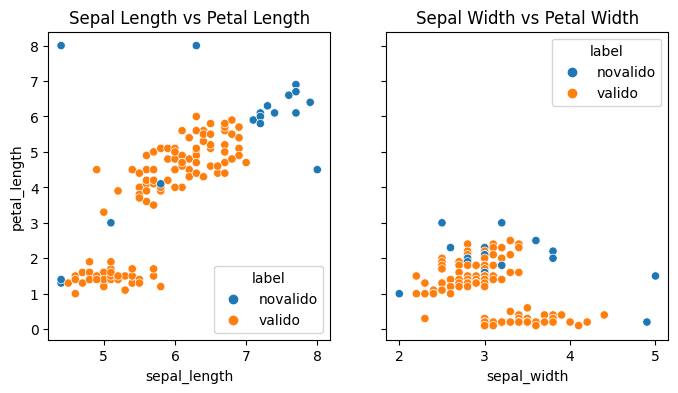

In [14]:
fig,axes = plt.subplots(1,2,figsize=(8,4),sharey=True)

sns.scatterplot(data[['sepal_length','petal_length','label']],x='sepal_length',y='petal_length',hue='label',ax=axes[0])
axes[0].set_title('Sepal Length vs Petal Length')
sns.scatterplot(data[['sepal_width','petal_width','label']],x='sepal_width',y='petal_width',hue='label',ax=axes[1])
axes[1].set_title('Sepal Width vs Petal Width')

5. Filtre los datos válidos y realice un gráfico de *sepal_length* vs *petal_length* categorizados por la etiqueta **species**.

<Axes: xlabel='sepal_length', ylabel='petal_length'>

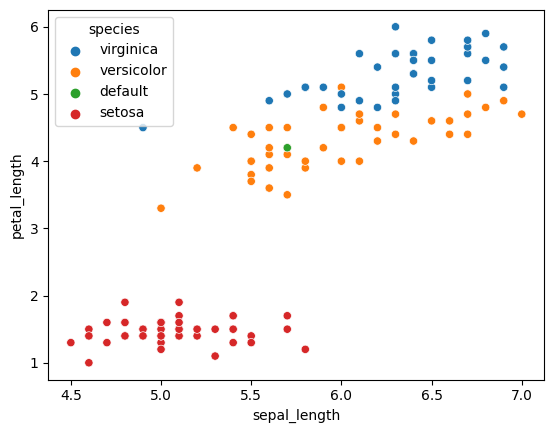

In [15]:
newdata=data.loc[data['label']=='valido']
sns.scatterplot(newdata,x='sepal_length',y='petal_length',hue='species')